In [1]:
import os

import numpy as np
from skimage import data, io

In [7]:
project_fldr = 'C:/Users/luken/Desktop/Dev/ee544-computer-vision'
data_fldr = f"{project_fldr}/data/imagenette_4class/train"
filenames = [f for f in os.listdir(f"{data_fldr}/church") if os.path.isfile(os.path.join(f"{data_fldr}/church", f))]
filenames

NameError: name 'os' is not defined

In [3]:
filenames[1:]

['10039-28827-3979.JPEG',
 '10055-31605-4779.JPEG',
 '10063-21880-24834.JPEG',
 '10065-14790-18298.JPEG',
 '10067-11562-17094.JPEG',
 '10101-8910-16241.JPEG',
 '10190-16857-29044.JPEG',
 '10208-12933-26393.JPEG',
 '10227-24393-16247.JPEG',
 '10263-4105-9494.JPEG',
 '10302-2036-12236.JPEG',
 '10316-14256-9087.JPEG',
 '10326-1958-9003.JPEG',
 '10431-24878-14379.JPEG',
 '10441-4634-6218.JPEG',
 '10497-31935-10706.JPEG',
 '10503-21826-8219.JPEG',
 '10514-747-7047.JPEG',
 '10552-11523-21183.JPEG',
 '10603-40-18034.JPEG',
 '10643-24982-19285.JPEG',
 '10665-11386-25225.JPEG',
 '10691-23352-251.JPEG',
 '10697-23098-20857.JPEG',
 '10713-76-31179.JPEG',
 '10797-14456-16501.JPEG',
 '10804-8027-17423.JPEG',
 '10870-20205-16453.JPEG',
 '10913-28920-7543.JPEG',
 '10914-17470-24898.JPEG',
 '10916-6571-13117.JPEG',
 '10919-11716-19009.JPEG',
 '10941-1699-8722.JPEG',
 '10943-7378-17903.JPEG',
 '11056-9386-7736.JPEG',
 '11118-9689-10185.JPEG',
 '11193-31392-15251.JPEG',
 '11211-12136-13528.JPEG',
 '1125

In [4]:
filenames[-1]

'9929-2882-24172.JPEG'

In [5]:
test_image = io.imread(os.path.join(f"{data_fldr}/church", filenames[-1]))
test_image.shape

(320, 470, 3)

Is this a preprocessed dataset? check if all images have the same shape (multiprocessing not working in Jupyter,
broader analysis performed in data_check.py)

In [8]:
## issues running multiprocessing in a Jupyter notebook so this was ran offline - data_check.py
import itertools
import multiprocessing as mp


data_root = f"{project_fldr}/data/imagenette_4class"
shape_check = []

# options = list(itertools.product(["train", "test", "validation"], ["church", "garbage_truck", "gas_pump", "parachute"]))
# print(options)
# jupyter multiprocessing issue, must import function for parallel processing
# https://stackoverflow.com/questions/47313732/jupyter-notebook-never-finishes-processing-using-multiprocessing-python-3/47374811#47374811
#
# def check_image_sizes(arguments):
#     print("checking")
#     shapes = []
#     fldr = arguments[0]
#     class_name = arguments[1]
#     print(f"processing for {fldr}/{class_name}")
#     files = [f for f in os.listdir(f"{data_root}/{fldr}/{class_name}") if os.path.isfile(os.path.join(f"{data_root}/{fldr}/{class_name}", f))]
#     print(f"{len(files)} images to check")
#     for f in files[1:]:
#         img = io.imread(os.path.join(f"{data_root}/{fldr}/{class_name}", f))
#         shapes.append(img.shape)
#     print(f"{fldr}-{class_name}, unique shapes are: {np.unique(shapes)}")
# if len(options) <= mp.cpu_count():
#     n_workers = len(options)
# else:
#     n_workers = mp.cpu_count()
# print(f"num workers = {n_workers}")
# with mp.Pool(4) as p:
#     p.map(check_image_sizes, options)

for f in filenames[1:]:
    img = io.imread(os.path.join(f"{data_fldr}/church", f))
    shape_check.append(img.shape)

np.unique(shape_check)

NameError: name 'filenames' is not defined

In [7]:
np.min(shape_check)

c:\users\luken\desktop\dev\ee544-computer-vision\venv\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


(320, 320)

c:\users\luken\desktop\dev\ee544-computer-vision\venv\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


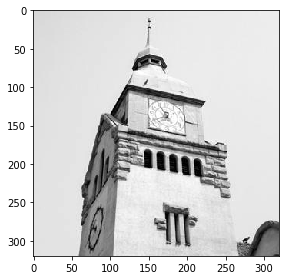

In [14]:
min_image = None
for f in filenames[1:]:
    img = io.imread(os.path.join(f"{data_fldr}/church", f))
    if img.shape == np.min(shape_check):
        min_image = img
        io.imshow(img)

(320, 431, 3)


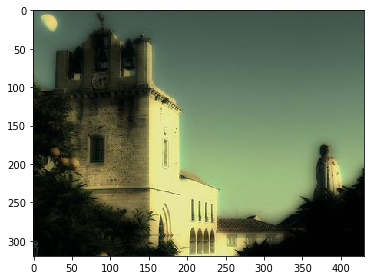

In [26]:
img = io.imread(os.path.join(f"{data_fldr}/church", filenames[1]))
print(img.shape)
io.imshow(img)

(320, 431)


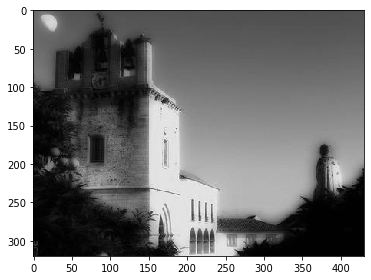

In [40]:
from skimage.color import rgb2gray
img_grey = rgb2gray(img)
print(img_grey.shape)
io.imshow(img_grey)

(320, 431)


c:\users\luken\desktop\dev\ee544-computer-vision\venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  """Entry point for launching an IPython kernel.


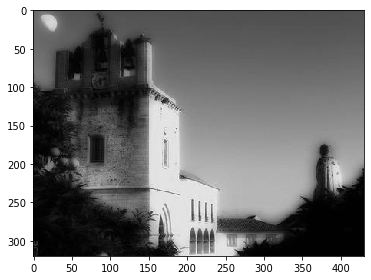

In [41]:
img1 = rgb2gray(img_grey)
print(img1.shape)
io.imshow(img1)

In [25]:
# img1 = img1 / 255
# from PIL import Image
# im = Image.open(os.path.join(f"{data_fldr}/church", filenames[1]))
# img1 = im.resize((320, 320))
# img1.show()

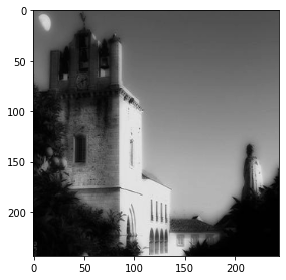

In [50]:
from skimage.transform import resize
img_grey = resize(img_grey, (244, 244))
io.imshow(img_grey)



In [53]:
fldr = "test"
# class_name = "parachute"
class_name = "garbage_truck"
files = [f for f in os.listdir(f"{data_root}/{fldr}/{class_name}") if os.path.isfile(os.path.join(f"{data_root}/{fldr}/{class_name}", f)) and f != '.gitkeep']
for f in files:
    img = io.imread(os.path.join(f"{data_root}/{fldr}/{class_name}", f))
    print(img.shape)

(320, 479, 3)
(320, 426, 3)
(320, 426, 3)
(320, 426, 3)
(320, 480, 3)
(320, 479, 3)
(320, 477, 3)
(320, 476, 3)
(320, 426, 3)
(320, 426, 3)
(320, 426, 3)
(320, 426, 3)
(320, 426, 3)
(320, 426, 3)
(320, 426, 3)
(320, 426, 3)
(320, 479, 3)
(320, 459, 3)
(320, 480, 3)
(320, 423, 3)
(320, 426, 3)
(320, 426, 3)
(320, 403, 3)
(320, 426, 3)
(426, 320, 3)
(320, 426, 3)
(320, 463, 3)
(320, 427, 3)
(320, 426, 3)
(320, 426, 3)
(320, 426, 3)
(320, 415, 3)
(320, 426, 3)
(320, 426, 3)
(320, 426, 3)
(320, 426, 3)
(320, 426, 3)
(320, 426, 3)
(320, 426, 3)
(320, 479, 3)
(320, 428, 3)
(320, 412, 3)
(320, 480, 3)
(320, 426, 3)
(320, 426, 3)
(320, 426, 3)
(320, 477, 3)
(320, 426, 3)
(320, 461, 3)
(320, 479, 3)


In [13]:
from vgglite_1 import load_data
(train_data, val_data, test_data) = load_data.load()
print(train_data.shape)

Found 4800 files belonging to 4 classes.
Found 400 files belonging to 4 classes.
Found 200 files belonging to 4 classes.


AttributeError: 'BatchDataset' object has no attribute 'shape'

In [14]:
train_data

<BatchDataset shapes: ((None, 244, 244, 1), (None, 4)), types: (tf.float32, tf.float32)>

In [5]:
len(train_data)

150

In [20]:
for img_batch, labels in train_data:
    print(img_batch.shape)
    print(labels.shape)
    break

(32, 244, 244, 1)
(32, 4)


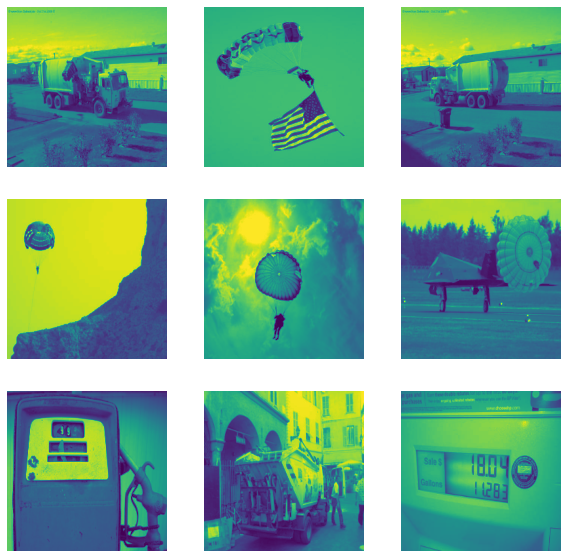

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

data = train_datagen.flow_from_directory(
    directory=f"{data_root}/train",
    target_size=(244, 244),
    color_mode="grayscale",
    classes=None,
    class_mode="categorical",
    batch_size=32,
)
data

Found 4800 images belonging to 4 classes.


In [12]:
len(data)

150

In [21]:
for img_batch, labels in data:
    print(img_batch.shape)
    print(labels.shape)
    break

(32, 244, 244, 1)
(32, 4)


In [44]:
plt.figure(figsize=(10, 10))
batch = data[0]
len(batch[0][4])
# for images in batch:
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].astype("uint8"))
#     plt.axis("off")

244

<Figure size 720x720 with 0 Axes>

In [50]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Input
from tensorflow.keras.models import Sequential

model = Sequential(name="VGG-lite")
# model.add(Input(shape=(244, 244)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(244, 244, 1)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dense(len(train_data.class_names), activation='relu'))


In [51]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "VGG-lite"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 244, 244, 32)      320       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 244, 244, 32)      9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 122, 122, 32)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 122, 122, 64)      18496     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 122, 122, 64)      36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 238144)            0  

In [77]:
model = Sequential(name="VGG-liter")
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(32, 32, 1))),
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dense(len(train_data.class_names), activation='relu'))
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "VGG-liter"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 8, 8, 64)          0 

need to modify load_data script I created to use this new image height/width, but may as well add an arg instead of
hardcoding (to facilitate experimentation in future or to allow reuse by others)

I followed the tf.keras source code to see how they handle tuples and graciously decided to borrow that (thanks to The TensorFlow Authors)

In [60]:
from tensorflow.python.keras.utils.conv_utils import normalize_tuple
normalize_tuple(value=32, n=2, name="input_dims")

(32, 32)

In [61]:
from utils import data_fldr
def build_dataset(fldr, dims=None):
    if dims is None:
        dims = (244, 244)  # default to VGG-16 input dimensions
    else:
        dims = normalize_tuple(value=dims, n=2, name="input_dims")
    return tf.keras.preprocessing.image_dataset_from_directory(
        directory=f"{data_fldr}/{fldr}",
        labels="inferred",
        label_mode="categorical",
        color_mode="grayscale",
        image_size=dims,
    )


def load(img_dims):
    return (
        build_dataset("train", img_dims),
        build_dataset("validation", img_dims),
        build_dataset("test", img_dims),
    )
(train_data, val_data, test_data) = load(32)

Found 4800 files belonging to 4 classes.
Found 400 files belonging to 4 classes.
Found 200 files belonging to 4 classes.


In [73]:
for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  print(labels_batch[1])
  break

(32, 32, 32, 1)
(32, 4)
tf.Tensor([0. 0. 1. 0.], shape=(4,), dtype=float32)


In [91]:
epochs=100
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs,
)

Epoch 1/100
150/150 [==============================] - 13s 82ms/step - loss: 4.8549 - accuracy: 0.2410 - val_loss: 4.8528 - val_accuracy: 0.3400

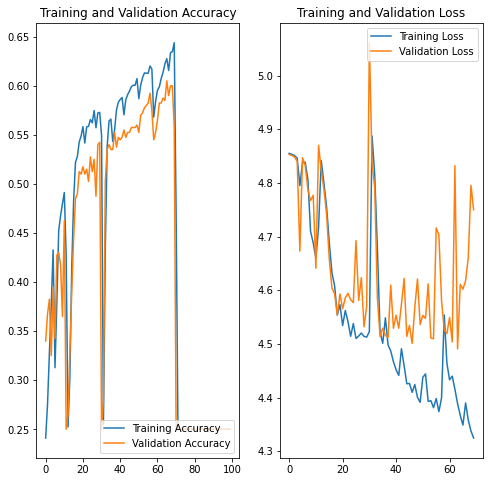

In [95]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [89]:
history.history

{'loss': [5.422771453857422,
  4.807179927825928,
  4.660000324249268,
  4.762936115264893,
  4.738457679748535,
  4.62324857711792,
  4.63187837600708,
  4.587782382965088,
  4.87007474899292,
  4.8567094802856445],
 'accuracy': [0.36125001311302185,
  0.4749999940395355,
  0.4831250011920929,
  0.3710416555404663,
  0.4008333384990692,
  0.5072916746139526,
  0.5206249952316284,
  0.5504166483879089,
  0.28979167342185974,
  0.22041666507720947],
 'val_loss': [4.9575419425964355,
  4.831480503082275,
  4.771763324737549,
  4.841436386108398,
  4.674311637878418,
  4.675087928771973,
  4.683366775512695,
  4.579286575317383,
  4.856898307800293,
  4.854160785675049],
 'val_accuracy': [0.4625000059604645,
  0.4925000071525574,
  0.3799999952316284,
  0.25,
  0.44999998807907104,
  0.4925000071525574,
  0.4925000071525574,
  0.5149999856948853,
  0.23499999940395355,
  0.25]}

In [96]:
print(f"Final training loss: {history.history['loss'][-1]}")
print(f"Final training acc: {history.history['accuracy'][-1]}")
print(f"Final validation loss: {history.history['val_loss'][-1]}")
print(f"Final validation acc: {history.history['val_accuracy'][-1]}")

Final training loss: nan
Final training acc: 0.25
Final validation loss: nan
Final validation acc: 0.25


In [98]:
import numpy as np
print(f"Final training loss: {np.min(history.history['loss'])}")
print(f"Final training acc: {np.max(history.history['accuracy'])}")
print(f"Final validation loss: {np.min(history.history['val_loss'])}")
print(f"Final validation acc: {np.max(history.history['val_accuracy'])}")


Final training loss: nan
Final training acc: 0.643958330154419
Final validation loss: nan
Final validation acc: 0.6050000190734863


In [ ]:
results = model.evaluate_generator(
    test_data,
)
